In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_excel("datasheet1.xlsx")

In [4]:
data.head()

,MFLCode,FacilityName,CCCNumber,VisitDate,DOB,Age,Gender,ChronicIllness,ChronicOnsetDate,ChronicOnsetDate.1,...,systolic_pressure (mmhg),diastolic_pressure (mmhg),MedicalCover,OtherMedicalCover,MedicalCoverStatus,knownAllergies,AllergyCausativeAgent,AllergicReaction,AllergySeverity,Date_Created
0,10739,Mt Kenya Sub County Hospital,1048504166,2023-05-24,1972-01-28,52,F,Hypertension,NaN,NaN,...,135.0,92.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-05-24
1,10739,Mt Kenya Sub County Hospital,1048504166,2023-08-23,1972-01-28,52,F,Hypertension,NaN,NaN,...,131.0,93.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-08-23
2,10739,Mt Kenya Sub County Hospital,1048504166,2024-02-08,1972-01-28,52,F,Hypertension,NaN,NaN,...,112.0,81.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2024-02-08
3,10739,Mt Kenya Sub County Hospital,1048504166,2024-08-07,1972-01-28,52,F,Hypertension,NaN,NaN,...,120.0,85.0,NHIF,NaN,Active,No,NaN,NaN,NaN,2024-08-07
4,10739,Mt Kenya Sub County Hospital,1070305050,2023-08-02,1979-03-15,45,F,Hypertension,NaN,NaN,...,163.0,99.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-08-02


In [5]:
data.columns

Index(['MFLCode', 'FacilityName', 'CCCNumber', 'VisitDate', 'DOB', 'Age',
       'Gender', 'ChronicIllness', 'ChronicOnsetDate', 'ChronicOnsetDate.1',
       'ControlledHypertensives', 'systolic_pressure (mmhg)',
       'diastolic_pressure (mmhg)', 'MedicalCover', 'OtherMedicalCover',
       'MedicalCoverStatus', 'knownAllergies', 'AllergyCausativeAgent',
       'AllergicReaction', 'AllergySeverity', 'Date_Created'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MFLCode                    581 non-null    int64         
 1   FacilityName               581 non-null    object        
 2   CCCNumber                  581 non-null    int64         
 3   VisitDate                  581 non-null    datetime64[ns]
 4   DOB                        581 non-null    datetime64[ns]
 5   Age                        581 non-null    int64         
 6   Gender                     581 non-null    object        
 7   ChronicIllness             567 non-null    object        
 8   ChronicOnsetDate           9 non-null      object        
 9   ChronicOnsetDate.1         0 non-null      float64       
 10  ControlledHypertensives    515 non-null    object        
 11  systolic_pressure (mmhg)   556 non-null    float64       
 12  diastoli

In [7]:
# Select relevant columns for statistical analysis and K-Means clustering
selected_columns = ['Age', 'Gender', 'ChronicIllness', 
                    'systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)','ControlledHypertensives']

# Create a new DataFrame with only the selected columns
df= data[selected_columns]

# Display the first few rows of the selected columns
df.head()


,Age,Gender,ChronicIllness,systolic_pressure (mmhg),diastolic_pressure (mmhg),ControlledHypertensives
0,52,F,Hypertension,135.0,92.0,Yes
1,52,F,Hypertension,131.0,93.0,No
2,52,F,Hypertension,112.0,81.0,Yes
3,52,F,Hypertension,120.0,85.0,Yes
4,45,F,Hypertension,163.0,99.0,Yes


In [8]:
df.isnull().sum()

Age                           0
Gender                        0
ChronicIllness               14
systolic_pressure (mmhg)     25
diastolic_pressure (mmhg)    27
ControlledHypertensives      66
dtype: int64

In [9]:
# Handling missing values
# Impute missing numerical values with the mean
df['systolic_pressure (mmhg)'].fillna(df['systolic_pressure (mmhg)'].mean())
df['diastolic_pressure (mmhg)'].fillna(df['diastolic_pressure (mmhg)'].mean())
df.dropna(inplace=True)

#print df
df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_18388\333810877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Age,Gender,ChronicIllness,systolic_pressure (mmhg),diastolic_pressure (mmhg),ControlledHypertensives
0,52,F,Hypertension,135.0,92.0,Yes
1,52,F,Hypertension,131.0,93.0,No
2,52,F,Hypertension,112.0,81.0,Yes
3,52,F,Hypertension,120.0,85.0,Yes
4,45,F,Hypertension,163.0,99.0,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 580
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        498 non-null    int64  
 1   Gender                     498 non-null    object 
 2   ChronicIllness             498 non-null    object 
 3   systolic_pressure (mmhg)   498 non-null    float64
 4   diastolic_pressure (mmhg)  498 non-null    float64
 5   ControlledHypertensives    498 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 27.2+ KB


In [11]:
df.to_excel('cleaned_datasheet.xlsx', index=False)


# Feature Selection:
This involves Choosing  relevant features for analysis. For example:
Descriptive statistics may focus on age, blood pressure, and illness status.
Clustering may include continuous variables like age, systolic_pressure, diastolic_pressure.

# 3. Statistical Analysis

     a) Descriptive Statistics
     Descriptive statistics may focus on age, blood pressure, and illness status.Calculate basic summary statistics (mean, median, mode, standard deviation, etc.) for numerical features.
     
     Visualize the distributions (histograms for continuous features, bar charts for categorical).

In [12]:
df=pd.read_excel('cleaned_datasheet.xlsx')
df.head()

,Age,Gender,ChronicIllness,systolic_pressure (mmhg),diastolic_pressure (mmhg),ControlledHypertensives
0,52,F,Hypertension,135,92,Yes
1,52,F,Hypertension,131,93,No
2,52,F,Hypertension,112,81,Yes
3,52,F,Hypertension,120,85,Yes
4,45,F,Hypertension,163,99,Yes


In [13]:
df.describe()

,Age,systolic_pressure (mmhg),diastolic_pressure (mmhg)
count,498.000000,498.000000,498.000000
mean,56.419679,131.094378,81.975904
std,9.755490,23.121173,12.755849
min,14.000000,62.000000,55.000000
25%,51.000000,116.000000,73.000000
50%,58.000000,128.000000,80.000000
75%,61.000000,143.000000,89.000000
max,82.000000,219.000000,141.000000


Visualizing Distributions:

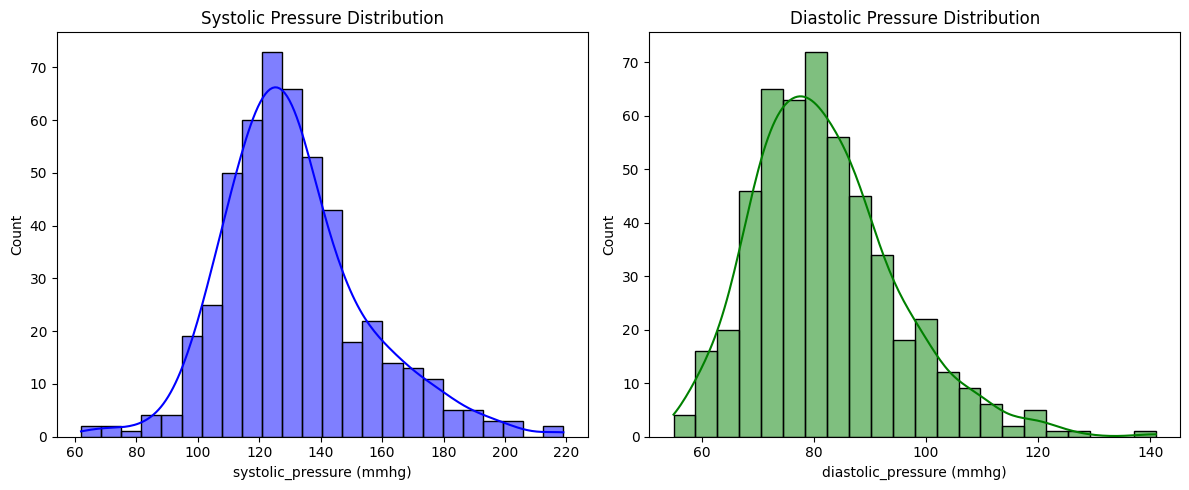

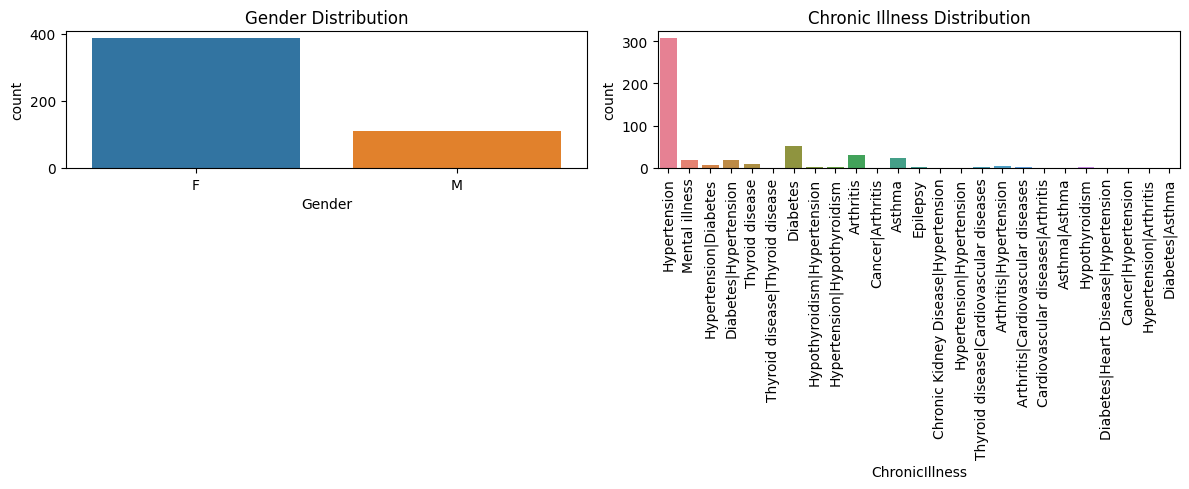

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for continuous features
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for systolic pressure
sns.histplot(df['systolic_pressure (mmhg)'], kde=True, ax=axs[0], color='blue')
axs[0].set_title('Systolic Pressure Distribution')

# Histogram for diastolic pressure
sns.histplot(df['diastolic_pressure (mmhg)'], kde=True, ax=axs[1], color='green')
axs[1].set_title('Diastolic Pressure Distribution')

plt.tight_layout()
plt.show()

# Bar charts for categorical features
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for Gender
sns.countplot(df, x='Gender', ax=axs[0], hue='Gender', legend=False)
axs[0].set_title('Gender Distribution')




# Bar chart for Chronic Illness
sns.countplot(df, x='ChronicIllness', ax=axs[1], hue='ChronicIllness', legend=False )
axs[1].set_title('Chronic Illness Distribution')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14044\1547963031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='systolic_pressure (mmhg)', palette='Set2')


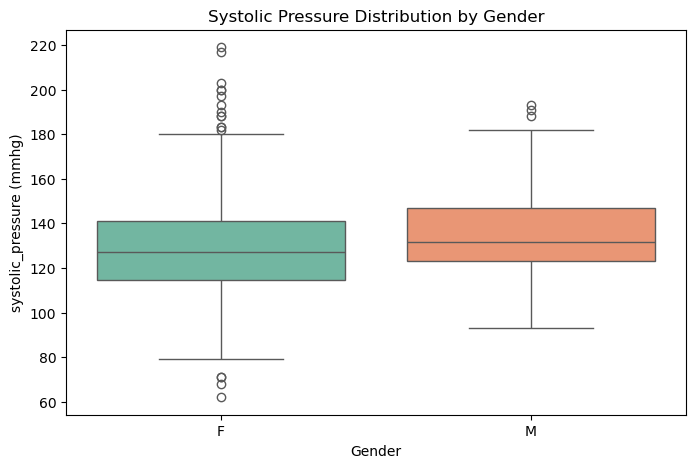

C:\Users\USER\AppData\Local\Temp\ipykernel_14044\1547963031.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='diastolic_pressure (mmhg)', palette='Set2')


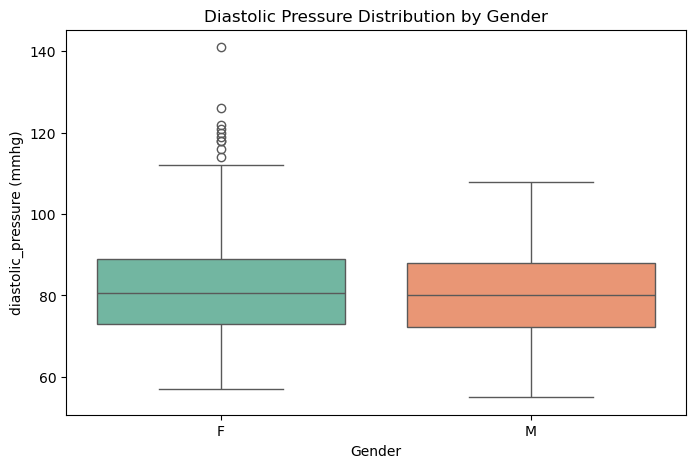

C:\Users\USER\AppData\Local\Temp\ipykernel_14044\1547963031.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChronicIllness', y='systolic_pressure (mmhg)', palette='Set3')


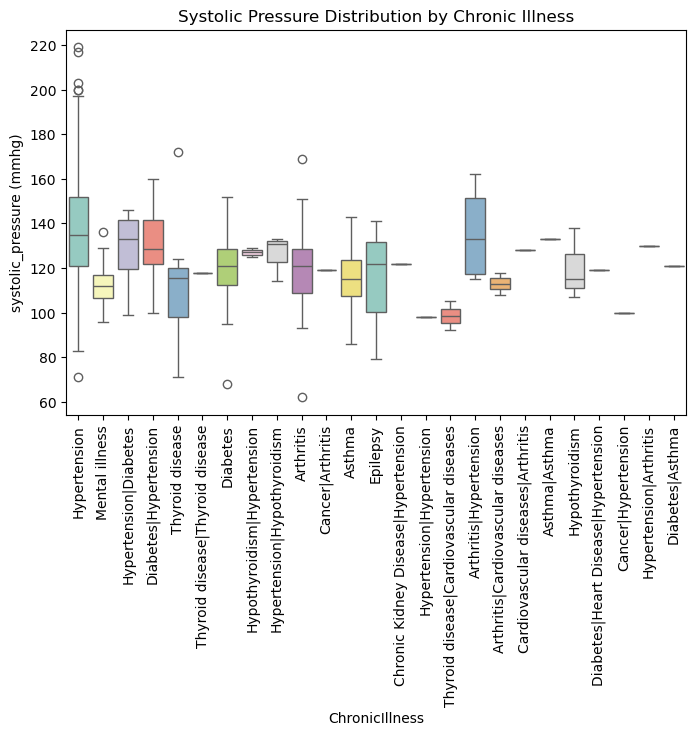

C:\Users\USER\AppData\Local\Temp\ipykernel_14044\1547963031.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChronicIllness', y='diastolic_pressure (mmhg)', palette='Set3')


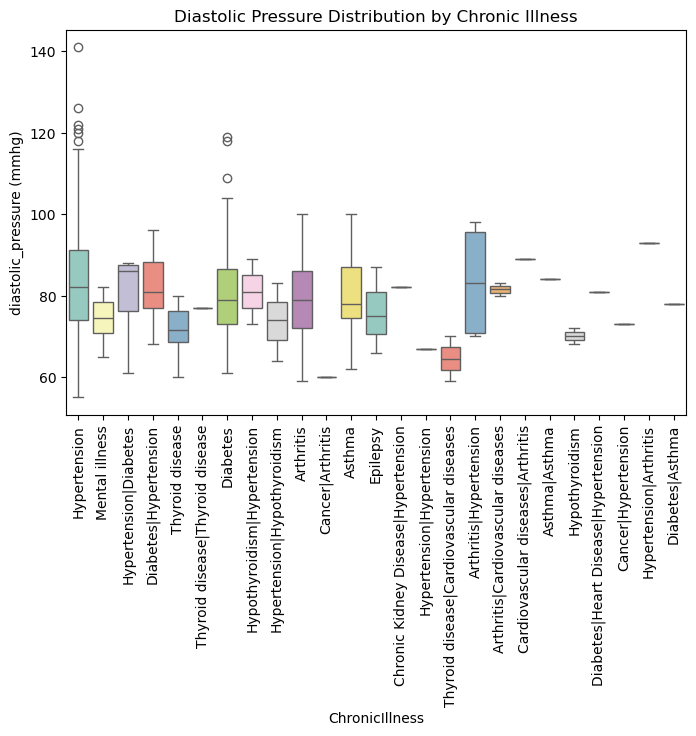

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for systolic pressure by gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='systolic_pressure (mmhg)', palette='Set2')
plt.title('Systolic Pressure Distribution by Gender')
plt.show()

# Box plot for diastolic pressure by gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='diastolic_pressure (mmhg)', palette='Set2')
plt.title('Diastolic Pressure Distribution by Gender')
plt.show()

# Box plot for systolic pressure by chronic illness
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='ChronicIllness', y='systolic_pressure (mmhg)', palette='Set3')
plt.title('Systolic Pressure Distribution by Chronic Illness')
plt.xticks(rotation=90)

plt.show()

# Box plot for diastolic pressure by chronic illness
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='ChronicIllness', y='diastolic_pressure (mmhg)', palette='Set3')
plt.title('Diastolic Pressure Distribution by Chronic Illness')
plt.xticks(rotation=90)

plt.show()



In [49]:
# Check the column names in the dataframe
print(df.columns)

Index(['Age', 'Gender', 'ChronicIllness', 'systolic_pressure (mmhg)',
       'diastolic_pressure (mmhg)', 'ControlledHypertensives'],
      dtype='object')


In [23]:
import pandas as pd

# Selecting numerical columns for correlation analysis
numerical_columns = ['Age','systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)']

# Pearson correlation (linear relationships)
pearson_corr = df[numerical_columns].corr(method='pearson')

# Spearman correlation (non-linear relationships)
spearman_corr = df[numerical_columns].corr(method='spearman')

print("Pearson Correlation Matrix:")
print(pearson_corr)
print("\nSpearman Correlation Matrix:")
print(spearman_corr)


Pearson Correlation Matrix:
                                Age  systolic_pressure (mmhg)  \
Age                        1.000000                  0.162068   
systolic_pressure (mmhg)   0.162068                  1.000000   
diastolic_pressure (mmhg) -0.142158                  0.404312   

                           diastolic_pressure (mmhg)  
Age                                        -0.142158  
systolic_pressure (mmhg)                    0.404312  
diastolic_pressure (mmhg)                   1.000000  

Spearman Correlation Matrix:
                                Age  systolic_pressure (mmhg)  \
Age                        1.000000                  0.180495   
systolic_pressure (mmhg)   0.180495                  1.000000   
diastolic_pressure (mmhg) -0.155192                  0.383405   

                           diastolic_pressure (mmhg)  
Age                                        -0.155192  
systolic_pressure (mmhg)                    0.383405  
diastolic_pressure (mmhg)          

In [18]:
# Check the column names in the dataframe
print(df.columns)


Index(['Age', 'Gender', 'ChronicIllness', 'systolic_pressure (mmhg)',
       'diastolic_pressure (mmhg)', 'ControlledHypertensives'],
      dtype='object')


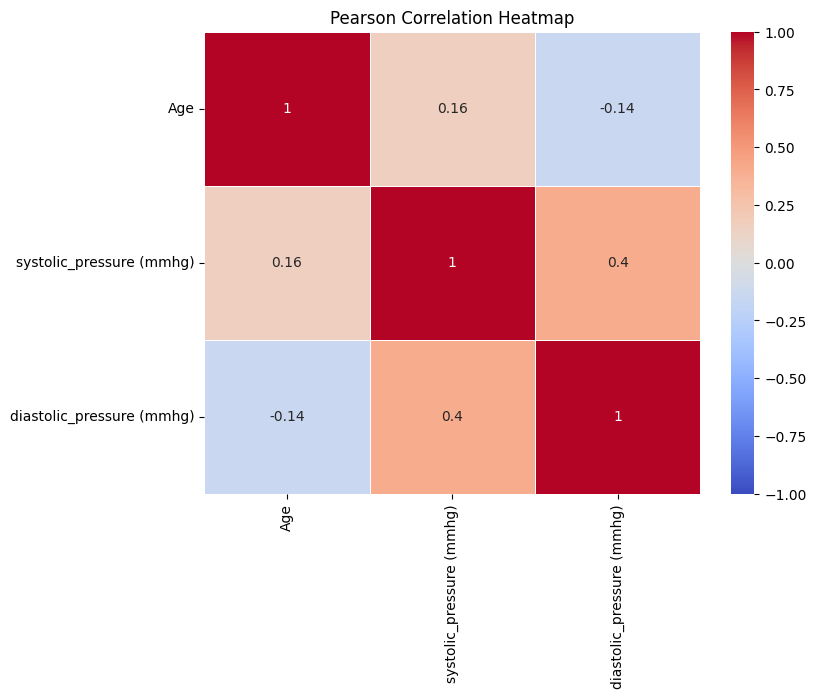

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation (linear relationships)
pearson_corr = df[numerical_columns].corr(method='pearson')

# Visualize the Pearson correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()


Hypothesis Testing:

We can test the hypothesis that systolic pressure differs across chronic illness categories. We'll use an ANOVA test to compare the means of systolic pressure across multiple chronic illness groups.

In [35]:
import scipy.stats as stats

# Group systolic pressure by ChronicIllness category
groups = [group['systolic_pressure (mmhg)'].dropna() for name, group in df.groupby('ChronicIllness')]

# ANOVA test to compare means across ChronicIllness groups
anova_result = stats.f_oneway(*groups)

print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA Test Result:
F-statistic: 4.695728247330902, p-value: 7.9148430250502e-12


Hypothesis:

Null hypothesis (H0): There is no significant difference in systolic pressure across different chronic illness groups.

Alternative hypothesis (H1): There is a significant difference in systolic pressure across different chronic illness groups.

If the p-value is less than 0.05, we reject the null hypothesis and conclude that systolic pressure varies significantly across chronic illness categories.

if you want to perform a t-test (for example, comparing systolic pressure between males and females), you can use this:

In [36]:
print(male_systolic.isnull().sum())
print(female_systolic.isnull().sum())



0
0


In [42]:
import scipy.stats as stats

# Drop NaN values
male_systolic = male_systolic.dropna()
female_systolic = female_systolic.dropna()

# Encode categorical variables
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})  # Convert gender to numerical (1 = Male, 0 = Female)
df['ChronicIllness'] = pd.factorize(df['ChronicIllness'])[0]  # Convert ChronicIllness to numeric codes


# Perform T-test
t_test_result = stats.ttest_ind(male_systolic, female_systolic)

print(f"T-Test Result (Male vs Female for Systolic Pressure):")
print(f"T-statistic: {t_test_result.statistic}, p-value: {t_test_result.pvalue}")


T-Test Result (Male vs Female for Systolic Pressure):
T-statistic: nan, p-value: nan


C:\Users\USER\AppData\Local\Temp\ipykernel_18388\1537545823.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_test_result = stats.ttest_ind(male_systolic, female_systolic)


In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# Load the dataset
file_path = 'datasheet1.xlsx'  # Replace with your dataset's file path
xls = pd.ExcelFile(file_path)
data = pd.read_excel(xls, 'Sheet1')

# Check for null values percentage in each column
null_percentage = data.isnull().sum() / len(data) * 100
print("Null Percentage in Each Column:\n", null_percentage)

# Drop columns where more than 50% of the values are missing
columns_to_drop = ['MedicalCover', 'MedicalCoverStatus']  # These have more than 50% missing data
data_cleaned = data.drop(columns=columns_to_drop)

# Fill remaining missing values
data_cleaned.fillna({
    'systolic_pressure (mmhg)': data_cleaned['systolic_pressure (mmhg)'].median(),
    'diastolic_pressure (mmhg)': data_cleaned['diastolic_pressure (mmhg)'].median(),
}, inplace=True)

# Encode categorical variables
data_cleaned['Gender'] = data_cleaned['Gender'].map({'M': 1, 'F': 0})  # Convert gender to numerical (1 = Male, 0 = Female)
data_cleaned['ChronicIllness'] = pd.factorize(data_cleaned['ChronicIllness'])[0]  # Convert ChronicIllness to numeric codes

# Normalize numerical features
scaler = StandardScaler()
data_cleaned[['systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)', 'Age']] = scaler.fit_transform(
    data_cleaned[['systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)', 'Age']]
)

# Check the preprocessed data
print("Preprocessed Data Sample:\n", data_cleaned.head())

# Hypothesis: T-Test for Systolic Pressure by Chronic Illness
# Null Hypothesis (H0): There is no significant difference in systolic pressure between patients with different chronic illnesses.
# Alternative Hypothesis (H1): There is a significant difference in systolic pressure between patients with different chronic illnesses.
group1 = data_cleaned[data_cleaned['ChronicIllness'] == 0]['systolic_pressure (mmhg)']  # Group 1: illness type 0
group2 = data_cleaned[data_cleaned['ChronicIllness'] == 1]['systolic_pressure (mmhg)']  # Group 2: illness type 1
t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
print("T-Test Results for Systolic Pressure by Chronic Illness - t-statistic:", t_stat, "p-value:", p_value)

# Hypothesis: T-Test for Systolic Pressure by Gender
# Null Hypothesis (H0): There is no significant difference in systolic pressure between male and female patients.
# Alternative Hypothesis (H1): There is a significant difference in systolic pressure between male and female patients.
group_male = data_cleaned[data_cleaned['Gender'] == 1]['systolic_pressure (mmhg)']  # Males
group_female = data_cleaned[data_cleaned['Gender'] == 0]['systolic_pressure (mmhg)']  # Females
t_stat_gender, p_value_gender = ttest_ind(group_male, group_female, nan_policy='omit')
print("T-Test Results for Systolic Pressure by Gender - t-statistic:", t_stat_gender, "p-value:", p_value_gender)

# Hypothesis: ANOVA Test for Systolic Pressure by Chronic Illness Groups
# Null Hypothesis (H0): The mean systolic pressure is the same across all chronic illness groups.
# Alternative Hypothesis (H1): The mean systolic pressure differs across chronic illness groups.
unique_illnesses = data_cleaned['ChronicIllness'].unique()

# Extract systolic pressure values for each ChronicIllness group
groups_for_anova = [data_cleaned[data_cleaned['ChronicIllness'] == illness]['systolic_pressure (mmhg)'] for illness in unique_illnesses]

# Perform the ANOVA test
anova_stat, anova_p_value = f_oneway(*groups_for_anova)
print("ANOVA Test Results - F-statistic:", anova_stat, "p-value:", anova_p_value)

SyntaxError: invalid non-printable character U+00A0 (2215497617.py, line 66)

In [43]:

from scipy.stats import ttest_ind, f_oneway
# Hypothesis: T-Test for Systolic Pressure by Chronic Illness
# Null Hypothesis (H0): There is no significant difference in systolic pressure between patients with different chronic illnesses.
# Alternative Hypothesis (H1): There is a significant difference in systolic pressure between patients with different chronic illnesses.
group1 = df[df['ChronicIllness'] == 0]['systolic_pressure (mmhg)']  # Group 1: illness type 0
group2 = df[df['ChronicIllness'] == 1]['systolic_pressure (mmhg)']  # Group 2: illness type 1
t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
print("T-Test Results for Systolic Pressure by Chronic Illness - t-statistic:", t_stat, "p-value:", p_value)


T-Test Results for Systolic Pressure by Chronic Illness - t-statistic: 4.813895432442641 p-value: 2.268706537860504e-06
